# Reporte de analisis VIII

# Identificando y excluyendo outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [2]:
datos = pd.read_csv('alquiler_residencial.csv', sep = ';')
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.67,Departamento
4,Departamento,Barranco,3,1,0,70,1200.0,0.0,0.0,17.14,Departamento
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
6,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
7,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
8,Departamento,Pachacámac,1,0,0,36,1200.0,0.0,0.0,33.33,Departamento
9,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,21.43,Departamento


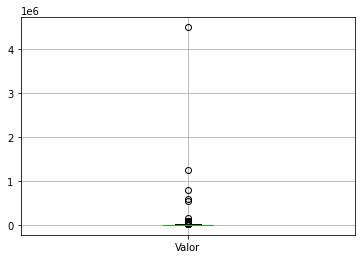

In [3]:
datos.boxplot(['Valor'])
# boxplot para poder identificar los outliers

In [4]:
datos[datos['Valor'] >= 500000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Agrupado
7996,Departamento,Ate,1,1,0,65,600000.0,980.0,120.0,9230.77,Departamento
11151,Casa en condominio,Callao,4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
13260,Departamento,Callao,2,2,1,150,550000.0,850.0,150.0,3666.67,Departamento
14502,Departamento,Jesús María,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Departamento
16251,Departamento,Chorrillos,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Departamento


In [5]:
valor = datos['Valor']

In [22]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - (1.5 * IIQ)
limite_superior = Q3 + (1.5 * IIQ)
# Declarar las ecuaciones para el boxplot

In [26]:
seleccion = ((valor >= limite_inferior) & (valor <= limite_superior))

In [27]:
datos_new = datos[seleccion]

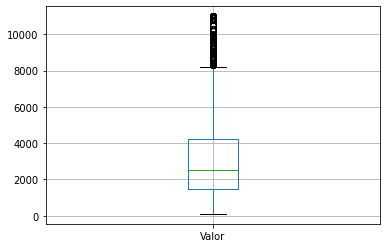

In [28]:
datos_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44a1b35c90>]],
      dtype=object)

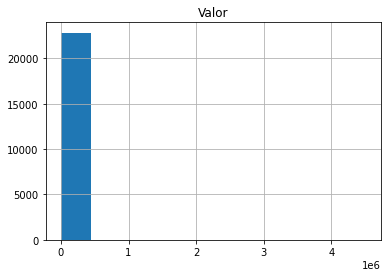

In [29]:
datos.hist(['Valor'])
# Histograma original

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44a1a90290>]],
      dtype=object)

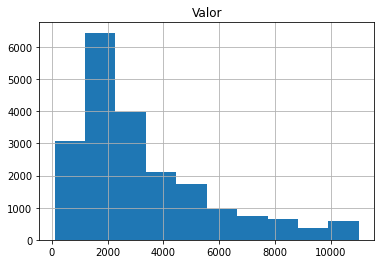

In [30]:
datos_new.hist(['Valor'])
# Histograma modificado

# Ejercicio

In [55]:
datos_muestra = pd.read_csv('alquiler_muestra.csv', sep = ';')
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.67,Departamento
4,Departamento,Barranco,3,1,0,70,1200.0,0.0,0.0,17.14,Departamento
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
6,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
7,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
8,Departamento,Pachacámac,1,0,0,36,1200.0,0.0,0.0,33.33,Departamento
9,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,21.43,Departamento


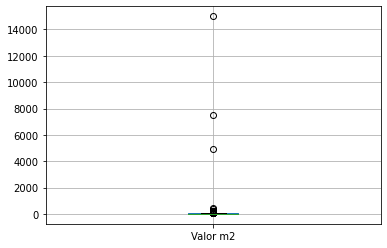

In [56]:
datos_muestra.boxplot(['Valor m2'])

In [57]:
datos_muestra[datos_muestra['Valor m2'] >= 4000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
535,Departamento,San Borja,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Departamento
726,Casa en condominio,Magdalena del Mar,4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
7493,Departamento,Villa María del Triunfo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Departamento


In [58]:
valor_muestra = datos_muestra['Valor m2']

In [59]:
q1 = valor_muestra.quantile(.25)
q3 = valor_muestra.quantile(.75)
iiq = q3 - q1
limite_inferior_muestra = q1 - (1.5 * iiq)
limite_superior_muestra = q3 + (1.5 * iiq)

In [60]:
seleccion_muestra = ((valor_muestra >= limite_inferior_muestra) & (valor_muestra <= limite_superior_muestra))

In [61]:
datos_new_muestra = datos_muestra[seleccion_muestra]

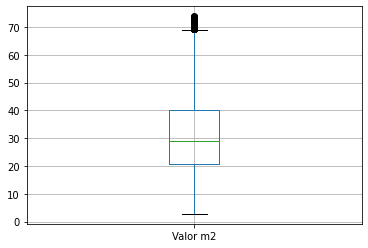

In [62]:
datos_new_muestra.boxplot(['Valor m2'])

# Identificando y excluyendo outliers (continuacion)

In [ ]:
# Hacer exclusiones por tipo

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


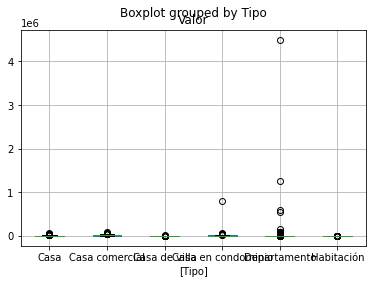

In [65]:
datos.boxplot(['Valor'], by = ['Tipo'])

In [64]:
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.67,Departamento
4,Departamento,Barranco,3,1,0,70,1200.0,0.0,0.0,17.14,Departamento
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
6,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
7,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
8,Departamento,Pachacámac,1,0,0,36,1200.0,0.0,0.0,33.33,Departamento
9,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,21.43,Departamento


In [68]:
grupo_tipo = datos.groupby('Tipo')['Valor']

In [69]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [72]:
grupo_tipo.groups

{'Casa': [1, 24, 56, 60, 101, 105, 152, 168, 190, 251, 263, 266, 277, 300, 324, 330, 349, 354, 372, 393, 400, 414, 440, 450, 491, 492, 498, 532, 564, 565, 590, 595, 596, 644, 648, 657, 663, 664, 690, 707, 731, 752, 755, 792, 803, 814, 893, 910, 978, 1028, 1076, 1083, 1167, 1172, 1174, 1207, 1229, 1303, 1310, 1374, 1393, 1408, 1429, 1473, 1487, 1491, 1503, 1508, 1536, 1539, 1553, 1655, 1674, 1708, 1730, 1736, 1740, 1746, 1759, 1785, 1793, 1840, 1891, 1916, 1956, 1987, 2015, 2024, 2044, 2109, 2129, 2146, 2166, 2192, 2198, 2199, 2226, 2266, 2298, 2301, ...], 'Casa comercial': [61, 144, 204, 338, 466, 504, 581, 594, 645, 668, 789, 805, 852, 935, 937, 939, 1000, 1091, 1240, 1354, 1439, 1462, 1497, 1563, 1578, 1845, 2032, 2262, 2596, 2625, 2645, 2695, 2703, 2746, 2774, 2916, 2994, 3072, 3230, 3242, 3256, 3348, 3426, 3484, 3486, 3497, 3506, 3725, 4006, 4060, 4124, 4171, 4182, 4658, 4742, 4942, 4972, 5032, 5113, 5140, 5171, 5232, 5256, 5291, 5445, 5502, 5506, 5507, 5576, 5606, 5738, 5863, 5940

In [73]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - (1.5 * IIQ)
limite_superior = Q3 + (1.5 * IIQ)

In [74]:
Q1

Tipo
Casa                  1100.0
Casa comercial        6000.0
Casa de villa          750.0
Casa en condominio    4000.0
Departamento          1600.0
Habitación             900.0
Name: Valor, dtype: float64

In [75]:
limite_inferior

Tipo
Casa                 -11950.0
Casa comercial       -12000.0
Casa de villa          -825.0
Casa en condominio   -12875.0
Departamento          -3500.0
Habitación                0.0
Name: Valor, dtype: float64

In [76]:
limite_superior

Tipo
Casa                  22850.0
Casa comercial        36000.0
Casa de villa          3375.0
Casa en condominio    32125.0
Departamento          10100.0
Habitación             2400.0
Name: Valor, dtype: float64

In [80]:
datos_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
  eh_tipo = datos['Tipo'] == tipo
  eh_dentro_limite = (datos['Valor'] >= limite_inferior[tipo]) & (datos['Valor'] <= limite_superior[tipo])
  seleccion = eh_tipo & eh_dentro_limite
  datos_seleccion = datos[seleccion]
  datos_new = pd.concat([datos_new, datos_seleccion])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


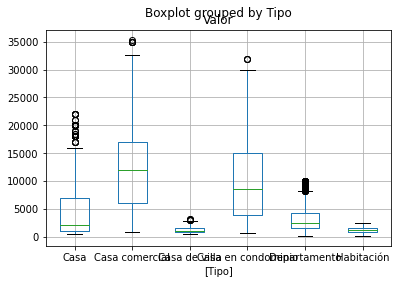

In [81]:
datos_new.boxplot(['Valor'], by = ['Tipo'])

In [83]:
datos_new.to_csv('alquiler_residencial_sin_outlier.csv', sep = ';', index = False)